# <font color=red> Prosper Loan Data Exploration </font>
## <font color=red> Preliminary Wrangling </font>
> **Prosper** is America’s first peer-to-peer lending marketplace, with more than 2 million members and over $2,000,000,000 in funded loans. Here we use the data available to the public (last updated on March 11th, 2014) from Prosper, which contains all the listings and loans ever created with 81 variables on each loan/listing, to do some data analysis.



In [1]:
# import all packages and set plots to be embedded inline..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe..
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Display the basic info about the dataset..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Display the shape of the data..
df.shape

(113937, 81)

In [6]:
# Display the data..
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [63]:
# Create a dataframe containing the columns that will be used..
columns=['ListingKey','ListingCreationDate','Term','Occupation','EmploymentStatus','LoanStatus','BorrowerState','BorrowerAPR','IncomeRange','Investors','ProsperScore','BorrowerRate']
new_df=df[columns]
new_df.head()

,ListingKey,ListingCreationDate,Term,Occupation,EmploymentStatus,LoanStatus,BorrowerState,BorrowerAPR,IncomeRange,Investors,ProsperScore,BorrowerRate
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Other,Self-employed,Completed,CO,0.16516,"$25,000-49,999",258,NaN,0.1580
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Professional,Employed,Current,CO,0.12016,"$50,000-74,999",1,7.0,0.0920
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Other,Not available,Completed,GA,0.28269,Not displayed,41,NaN,0.2750
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Skilled Labor,Employed,Current,GA,0.12528,"$25,000-49,999",158,9.0,0.0974
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Executive,Employed,Current,MN,0.24614,"$100,000+",20,4.0,0.2085


In [64]:
#summary stat
new_df.describe()

,Term,BorrowerAPR,Investors,ProsperScore,BorrowerRate
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000
mean,40.830248,0.218828,80.475228,5.950067,0.192764
std,10.436212,0.080364,103.239020,2.376501,0.074818
min,12.000000,0.006530,1.000000,1.000000,0.000000
25%,36.000000,0.156290,2.000000,4.000000,0.134000
50%,36.000000,0.209760,44.000000,6.000000,0.184000
75%,36.000000,0.283810,115.000000,8.000000,0.250000
max,60.000000,0.512290,1189.000000,11.000000,0.497500


### <font color=blue> What is the structure of your dataset? </font>
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

### <font color=blue>What is/are the main feature(s) of interest in your dataset?</font>

> I'm most interested in figuring out what features are  affect a loan’s outcome status & e borrower’s interest rate.

### <font color=blue>What features in the dataset do you think will help support your investigation into your feature(s) of interest? </font>
> I expect that the income range and employment status will have the strongest effect on each loan: the larger the income, the higher the loan.

## <font color=red>Univariate Exploration </font>
> We will investigate the distributions of individual variables.

### <font color=blue>1- What is the most income range? </font> 


In [60]:
new_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

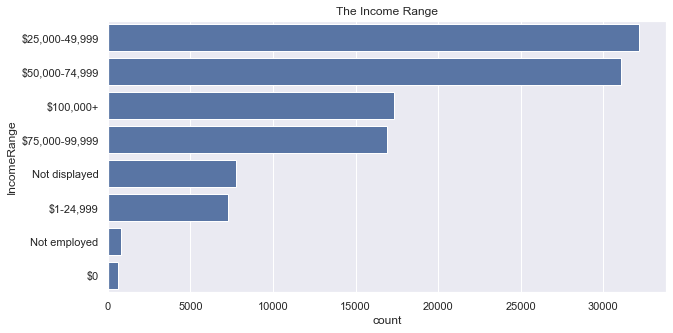

In [36]:
# plotting a bar chart
plt.figure(figsize = [10, 5])
order = new_df.IncomeRange.value_counts().index
color=sb.color_palette()[0]
sb.set_theme(style='darkgrid')
sb.countplot(data=new_df,y='IncomeRange',color=color,order=order)
plt.title('The Income Range');

> **We can see that the highest income range for borrowers is 25,000-49,999.**

*  **I think that the unemployed people or with 0$ income can take a loan guarantee of things other than income.**

### <font color=blue>2- What is the top borrowers states ? </font> 


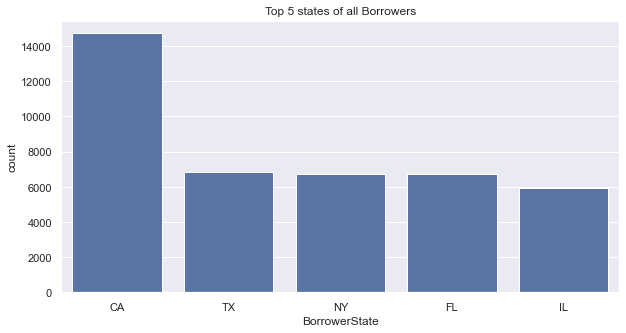

In [48]:
# plotting a bar chart
plt.figure(figsize = [10, 5]) 
order=new_df['BorrowerState'].value_counts().head().index
color=sb.color_palette()[0]
sb.set_theme(style='darkgrid')
sb.countplot(data=new_df,x='BorrowerState',order=order,color=color)
plt.title("Top 5 states of all Borrowers");


> **California  has the heighest number of borrowers. More than 140000 person.**

### <font color=blue>3- What is most frequency Prosper Score ? </font>

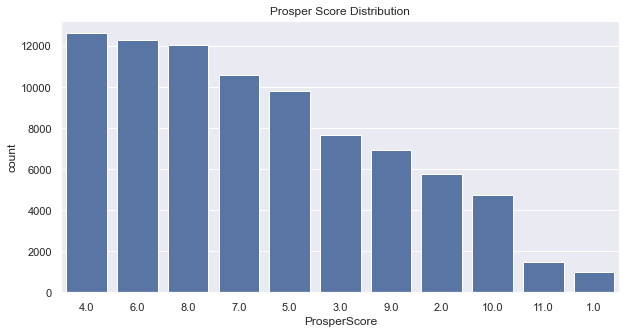

In [47]:
# plotting a bar chart
plt.figure(figsize = [10, 5]) 
sb.set_theme(style='darkgrid')
order=new_df['ProsperScore'].value_counts().index
color=sb.color_palette()[0]
sb.countplot(data=new_df,x='ProsperScore',order=order,color=color)
plt.title("Prosper Score Distribution");

> **Prosper Scores** range from “1” to “11”, with 11 being the best quality, or lowest risk loan.<br>
We can see that the most frequent score is **4.0** and 11.0 isn't that frequent.

### <font color=blue>4- What is the status of loans? </font>


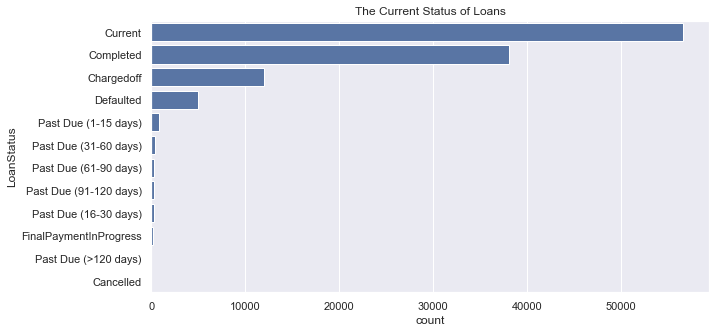

In [46]:
# plotting a bar chart
plt.figure(figsize = [10, 5]) 
order=new_df['LoanStatus'].value_counts().index
color=sb.color_palette()[0]
sb.set_theme(style='darkgrid')
sb.countplot(data=new_df,y='LoanStatus',order=order,color=color);
plt.title('The Current Status of Loans');


> **We can see that current, completed, chareger off is the most frequent loan status.**

### <font color=blue> 5- What is the borrower current emoplyment status?</font>



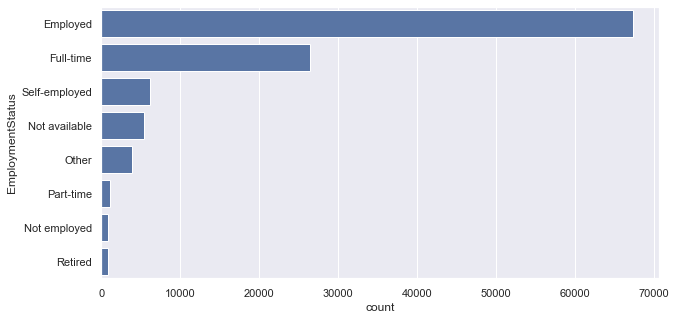

In [45]:
# plotting a bar chart
plt.figure(figsize = [10, 5]) 
order=new_df['EmploymentStatus'].value_counts().index
color=sb.color_palette()[0]
sb.set_theme(style='darkgrid')
sb.countplot(data=new_df,y='EmploymentStatus',order=order,color=color);

> **We can see that the most frequent employment status is Employed, Full-time, Self-employed.**

### <font color=blue> 6- What is the most frequency Occupation of the borrowers ?</font>


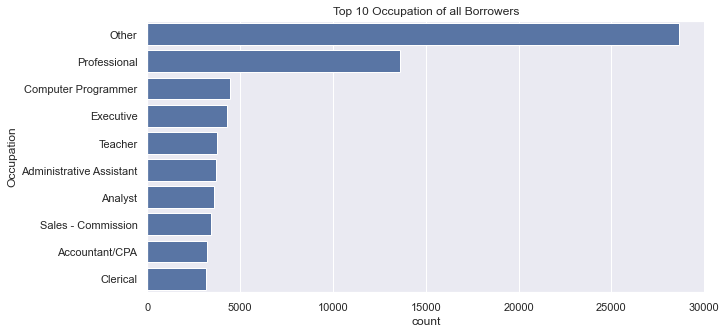

In [51]:
# plotting a bar chart
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
order=new_df['Occupation'].value_counts().index
order=new_df['Occupation'].value_counts().head(10).index 
sb.countplot(data = new_df, y = 'Occupation', color = base_color,
             order = order)
plt.title("Top 10 Occupation of all Borrowers");

> **If we ignore 'other'. We can see that the most frequent occupation for taking loans are Professional, Computer Programmer, Executive.**

### <font color=blue> 7- what is the distribution of Borrowering Rate?</font>


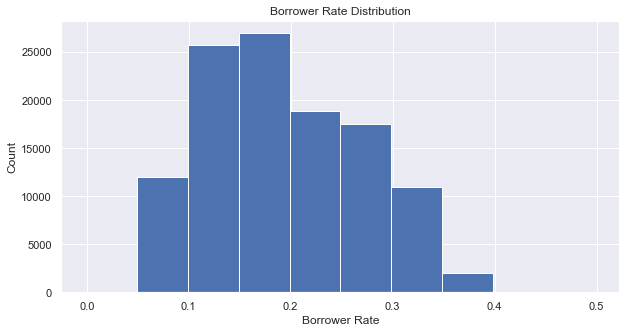

In [59]:
# plotting a histogram
plt.figure(figsize = [10, 5]) 
plt.hist(data = new_df, x = 'BorrowerRate',bins=10);
plt.xlabel('Borrower Rate');
plt.ylabel('Count');
plt.title("Borrower Rate Distribution");

> **We can see here that the most frequent borrower rate is between 15%-20%.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The highest Borrower state is **California** and the most frequent borrower rate is between **15%-20%** .

## <font color=red>Bivariate Exploration </font>


### <font color=blue> 1- Relationship between Term and IncomeRange.</font>
 

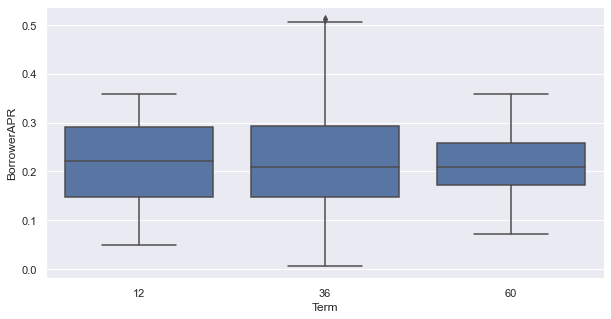

In [74]:
#plotting boxplot
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=new_df ,y='BorrowerAPR', x='Term',color=base_color);

> **We can see that 36 month is the largrest range.**

### <font color=blue>2- BorrowerRate pattern over the years.</font>



In [71]:
new_df['year'] = new_df.ListingCreationDate.str.split('-').str[0]

<ipython-input-71-fc336274586c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = new_df.ListingCreationDate.str.split('-').str[0]


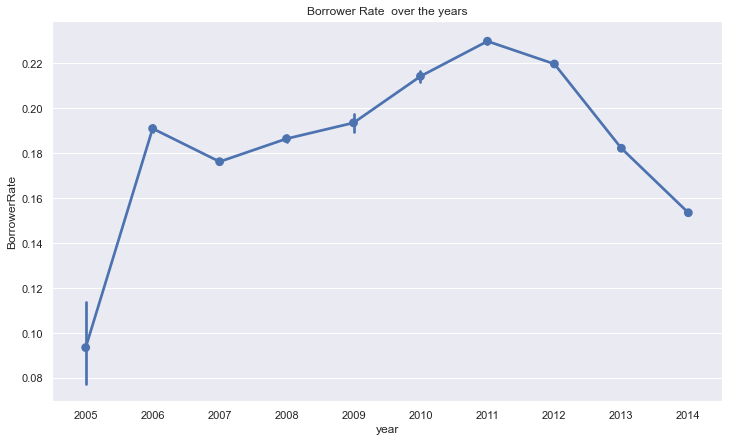

In [76]:
plt.figure(figsize = [12, 7])
years = np.sort(new_df.year.unique())
sb.pointplot(data=new_df, x='year', y='BorrowerRate', order = years)
plt.title('Borrower Rate  over the years');

> **We can see here that the BorrowRate increased alot between 2005-2006 and then dropped between 2006-2007 and then increased over the years 2007-2011 and 2011 was at his heighest and then started to drop again over the years 2011-2014**.

### <font color=blue>3- Relationship between IncomeRange & BorrowRate.</font>

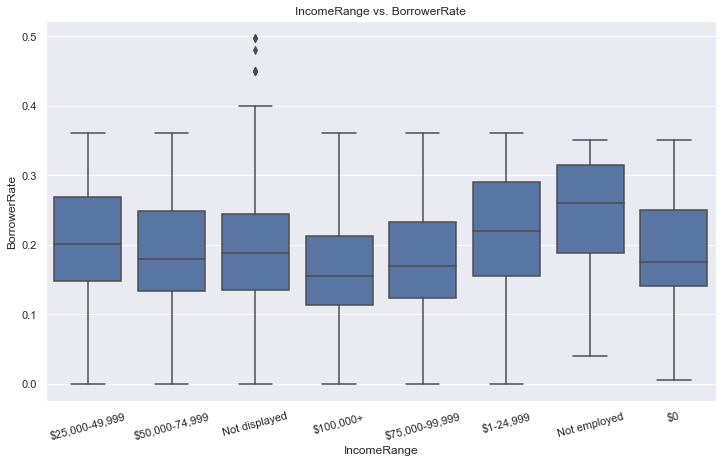

In [82]:
plt.figure(figsize = [12, 7])
color = sb.color_palette()[0]
sb.boxplot(data=new_df, x='IncomeRange', y='BorrowerRate',color=color)
plt.title('IncomeRange vs. BorrowerRate')
plt.xticks(rotation=15);

>**We can see that Borrower Rate was highest for not employed, and lowest for who earn more than 100k.**


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> We can see that Borrower Rate was **highest for not employed**, and **lowest for who earn more than 100k**, we can see here that the BorrowRate increased alot between **2005-2006** and then dropped between **2006-2007** and then increased over the years **2007-2011** and **2011** was at his heighest and then started to drop again over the years **2011-2014**.

## <font color=red>Multivariate Exploration.</font>
### <font color=BLUE>Does the increase of the term leads to increase higher amount of loans ?.</font>






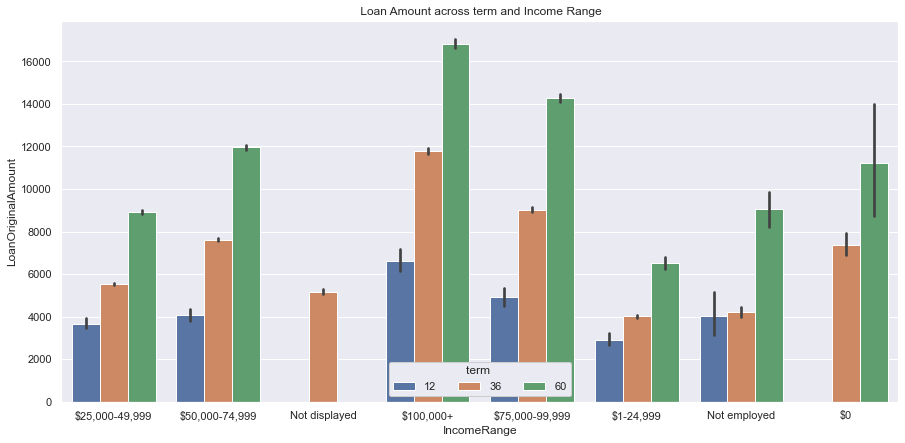

In [84]:
plt.figure(figsize = [15, 7])
ax = sb.barplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'term ')
plt.title(' Loan Amount across term and Income Range');

## <font color=red>Summary</font>
>* The highest Borrower state is California.<br>
>* Borrower Rate was highest for not employed, and lowest for who earn more than 100k.
>* The Borrow Rate increased alot between 2005-2006 and then dropped between 2006-2007 and then increased over the years 2007-2011 and 2011 was at his heighest and then started to drop again over the years 2011-2014. 

